In [84]:
import os
import tensorflow as tf
from tensorflow.keras.applications import resnet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
train_dir = r'C:\Users\Steven\CIS579-Project\data3a\training'
val_dir = r'C:\Users\Steven\CIS579-Project\data3a\validation'

In [86]:
img_width, img_height = 150, 150

In [87]:
epochs = 20
batch_size=32

In [88]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [89]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1383 images belonging to 3 classes.
Found 248 images belonging to 3 classes.


In [90]:
import random
import numpy as np

# Function to randomly assign cost ranges based on class
def assign_random_cost(label):
    if label == 0:  # minor
        return random.randint(100, 300)
    elif label == 1:  # moderate
        return random.randint(301, 500)
    elif label == 2:  # severe
        return random.randint(501, 2000)

# Helper function to generate data with consistent costs
def prepare_data(generator):
    data = []
    labels = []
    costs = []

    for i in range(len(generator)):
        images, class_labels = generator[i]
        for j in range(len(images)):
            label = np.argmax(class_labels[j])  # Get the class index
            cost = assign_random_cost(label)  # Assign random cost
            data.append(images[j])
            labels.append(label)
            costs.append(cost)  # Save assigned cost

    return np.array(data), np.array(labels), np.array(costs)

# Prepare training data
train_data, train_class_labels, train_cost_labels = prepare_data(train_generator)

# Prepare validation data
val_data, val_class_labels, val_cost_labels = prepare_data(val_generator)


In [91]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Regression output layer


C:\Users\Steven\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # MAE for human-readable evaluation

In [93]:
history = model.fit(
    train_data, train_labels,
    epochs=2,
    batch_size=32,
    validation_data=(val_data, val_labels)
)


Epoch 1/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 416569.1875 - mae: 491.9249 - val_loss: 369771.0000 - val_mae: 601.8378
Epoch 2/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - loss: 314354.4688 - mae: 433.2984 - val_loss: 607040.3125 - val_mae: 773.2427


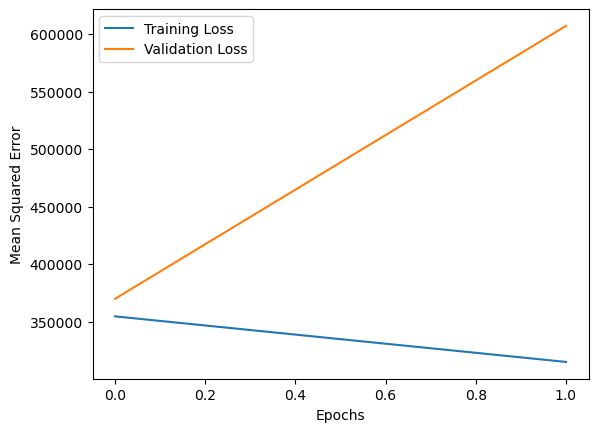

In [94]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
Confusion Matrix:


C:\Users\Steven\AppData\Local\Temp\ipykernel_40344\2298795730.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
C:\Users\Steven\AppData\Local\Temp\ipykernel_40344\2298795730.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])


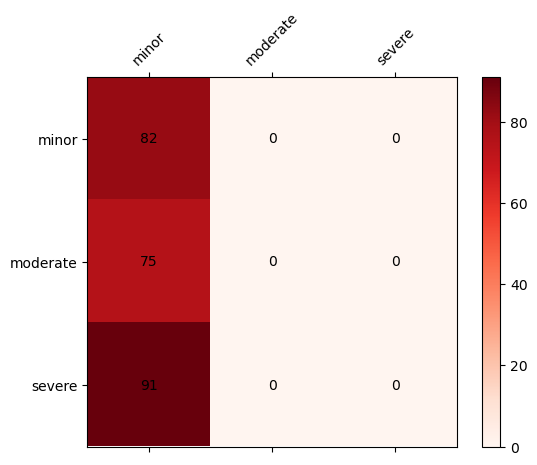

Classification Report:
              precision    recall  f1-score   support

    01-minor       0.33      1.00      0.50        82
 02-moderate       0.00      0.00      0.00        75
   03-severe       0.00      0.00      0.00        91

    accuracy                           0.33       248
   macro avg       0.11      0.33      0.17       248
weighted avg       0.11      0.33      0.16       248



C:\Users\Steven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Steven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Steven\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
import numpy as np
val_images, val_labels = [], []
class_names = sorted(train_generator.class_indices.keys())
for i in range(len(val_generator)):
    images, labels = val_generator[i]
    val_images.extend(images)
    val_labels.extend(np.argmax(labels, axis=1))


val_images = np.array(val_images)
val_labels = np.array(val_labels)

predictions = model.predict(val_images)


from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(predictions, axis=1)
y_true = val_labels

confusion_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap='Reds')

cbar = fig.colorbar(cax)

ax.set_xticklabels([''] + ['minor', 'moderate', 'severe'], rotation=45)
ax.set_yticklabels([''] + ['minor', 'moderate', 'severe'])

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')
print('Confusion Matrix:')

plt.show()



report = classification_report(y_true, y_pred, target_names=class_names)
print('Classification Report:')
print(report)


In [96]:
model.save('damage_classification_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


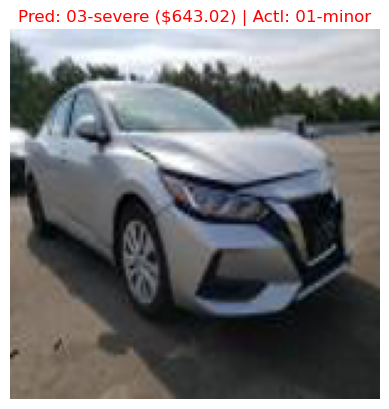

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


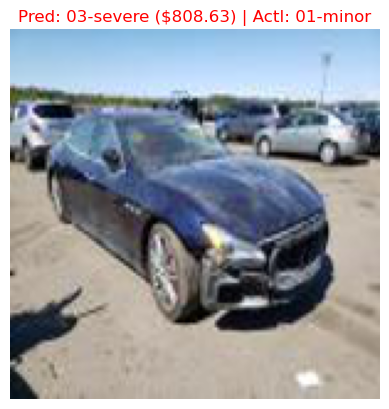

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


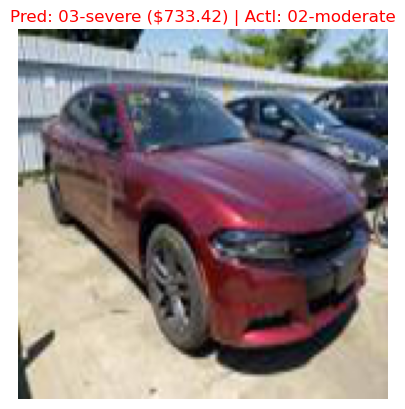

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


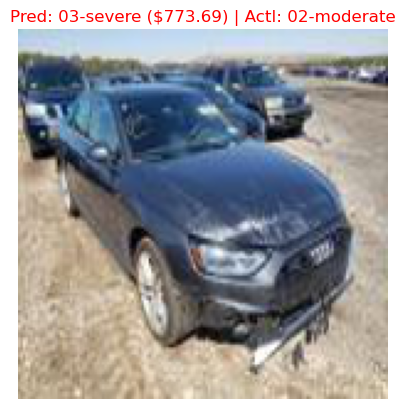

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


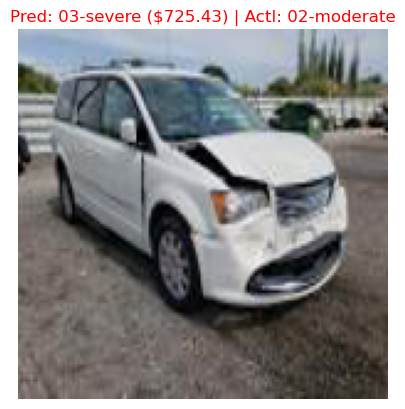

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


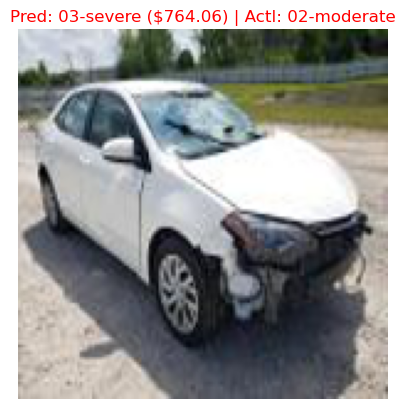

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


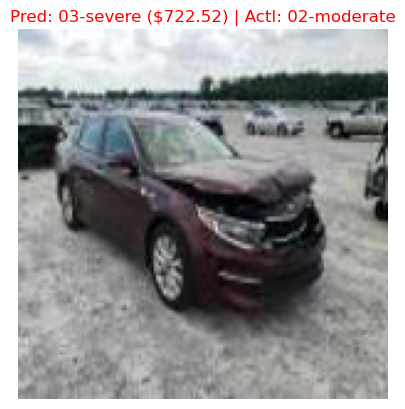

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


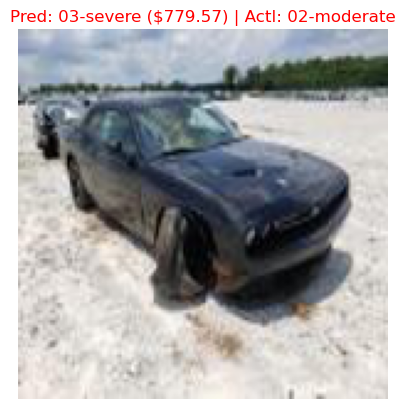

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


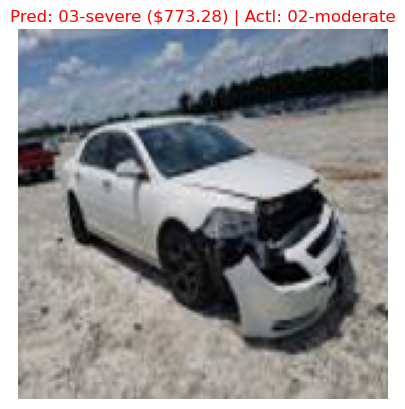

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


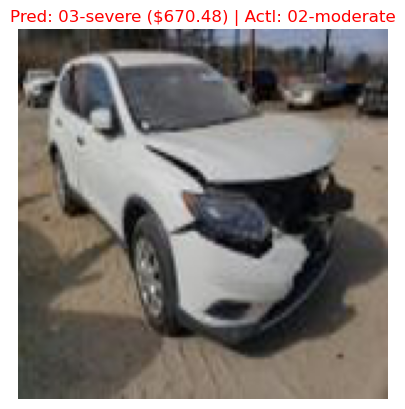

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


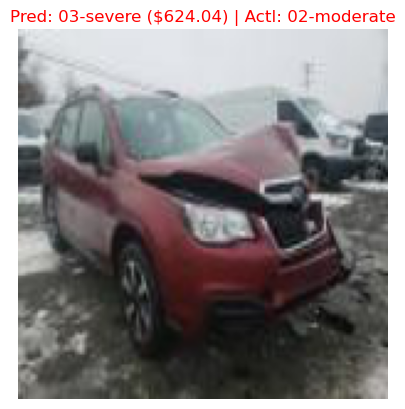

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


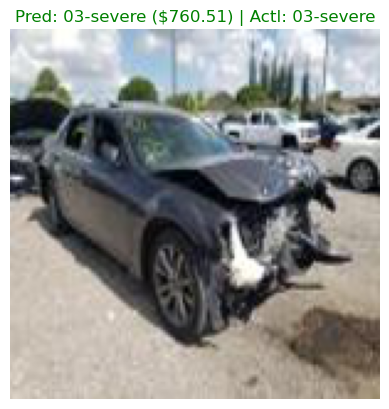

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


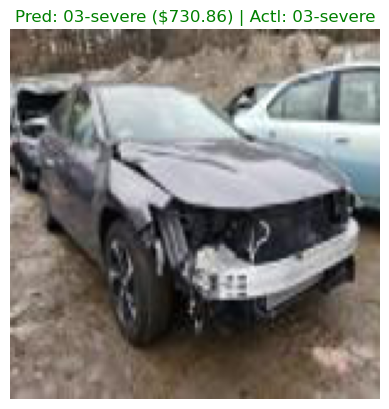

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


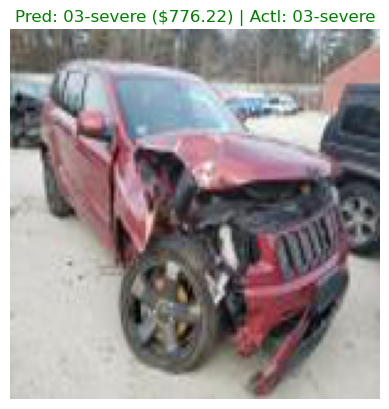

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


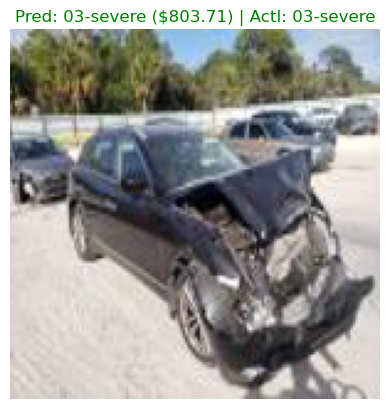

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


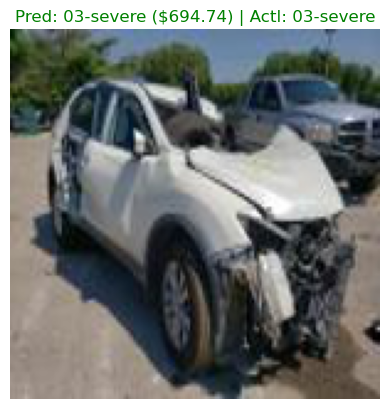

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


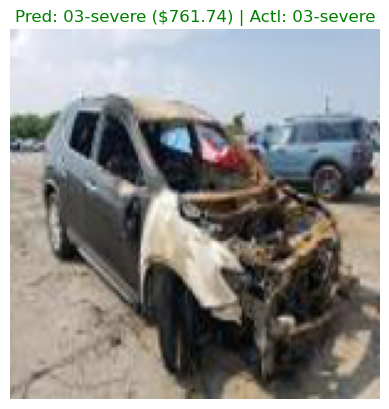

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


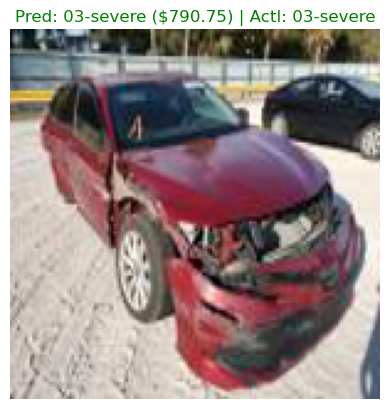

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


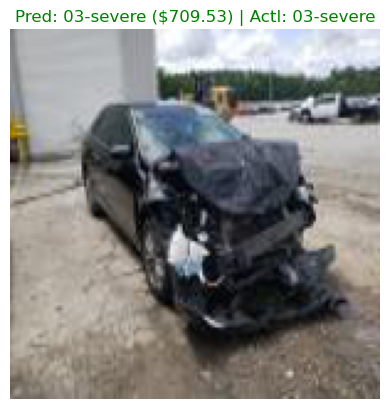

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


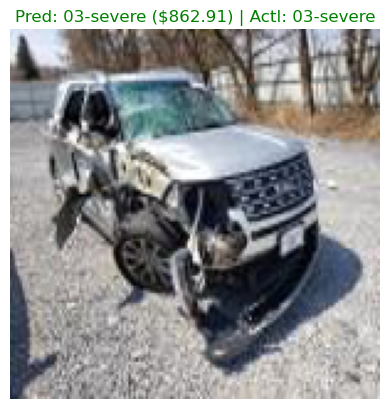

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


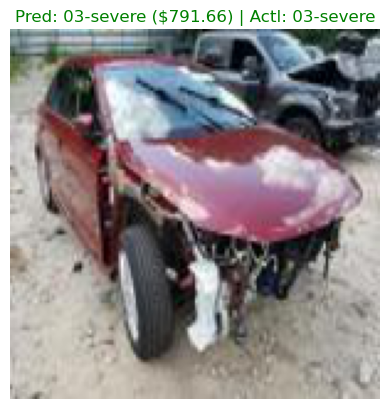

False: 12
True: 10


In [97]:
class_names = ["01-minor", "02-moderate", "03-severe"]

# Cost ranges for each class
cost_ranges = {
    "01-minor": (100, 300),
    "02-moderate": (301, 500),
    "03-severe": (501, 2000)
}

# Map the cost to its severity class
def get_severity_from_cost(cost):
    if 100 <= cost <= 300:
        return "01-minor"
    elif 301 <= cost <= 500:
        return "02-moderate"
    elif 501 <= cost <= 2000:
        return "03-severe"
    return "Unknown"

image_paths = []
for class_name in class_names:
    folder_path = os.path.join(val_dir, class_name)
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))

negative = 0
positive = 0

for image_path in image_paths:
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)

    # Predict the repair cost
    predicted_cost = model.predict(img)[0][0]  # Predicted continuous cost
    predicted_severity = get_severity_from_cost(predicted_cost)  # Map cost to severity

    # Get actual severity from folder name
    actual_severity = os.path.basename(os.path.dirname(image_path))

    # Compare predicted and actual severity
    if predicted_severity == actual_severity:
        positive += 1
        plt.title(f"Pred: {predicted_severity} (${predicted_cost:.2f}) | Actl: {actual_severity}", color='green')
    else:
        negative += 1
        plt.title(f"Pred: {predicted_severity} (${predicted_cost:.2f}) | Actl: {actual_severity}", color='red')

    # Show the image and results
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

print('False: ' + str(negative) + '\nTrue: ' + str(positive))
